# **Project 2**, APS1070 Winter 2021
**Anomaly Detection Algorithm using Gaussian Mixture Model [15 Marks]**

**Deadline: Feb 27, 11 PM - 15 points**

**Academic Integrity**

This project is individual - it is to be completed on your own. If you have questions, please post your query in the APS1070 Piazza Q&A forums (the answer might be useful to others!).

Do not share your code with others, or post your work online. Do not submit code that you have not written yourself. Students suspected of plagiarism on a project, midterm or exam will be referred to the department for formal discipline for breaches of the Student Code of Conduct.

Please fill out the following:


*   Name: Anchit Vijayakumar
*   Student Number: 1007014035

##**Part 1: Getting started [2 Marks]**

We are going to work with a credit card fraud dataset. This dataset contains 28 key features, which are not 
directly interpretable but contain meaningful information about the dataset.

Load the dataset in CSV file using Pandas. The dataset is called `creditcard.csv`. Print out the first few columns of the dataset.

* How many rows are there? _____ **[0.1]**
* What features in the dataset are present aside from the 28 main features?  _____ **[0.1]**
* Which column contains the targets? **[0.1]**
* To what do the target values correspond?_____ **[0.1]**

In [ ]:
pip install wget

  Created wheel for wget: filename=wget-3.2-cp37-none-any.whl size=9681 sha256=0572413da0861d82708dac1a5264b1250e9e43b521cf7c5dd8138203e963e071
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget


In [ ]:
import wget

wget.download('https://github.com/aps1070-2019/datasets/raw/master/creditcard.tar.gz','creditcard.tar.gz')

'creditcard.tar.gz'

In [ ]:
!tar -zxvf creditcard.tar.gz

creditcard.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
df = pd.read_csv('creditcard.csv')

In [ ]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [ ]:
#How many rows are there?
print('There are %d rows in the dataset' %df.shape[0])

There are 284807 rows in the dataset


In [ ]:
#What features in the dataset are present aside from the 28 main features?

features2=[f for f in df.columns if 'V' not in f]
print(df.columns)
print('The other features are', features2)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')
The other features are ['Time', 'Amount', 'Class']


In [ ]:
#Which column contains the targets?
df.loc[:, 'Class']
target = np.array(df['Class'])
print('The Targets are contained in the "Class" column having', np.unique(target))

The Targets are contained in the "Class" column having [0 1]


In [ ]:
#To what do the target values correspond?
print('The target values are', np.unique(target) ,'which corresponds to "Non-Fraudulent" and "Fraudulent" respectively')

The target values are [0 1] which corresponds to "Non-Fraudulent" and "Fraudulent" respectively


It's important when looking at a new dataset to figure out how many examples we have for each class.

* What is the percentage of entries in the dataset for each class? _____ **[0.1]**
* Is this data considered balanced or unbalanced? Why is this the case?_____ **[0.1]**
* Why is balance/imbalance important? How might this class ditribution affect a KNN classifier for example, which we explored in Project 1? _____ **[0.2]**



In [ ]:
 (df['Class']).value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [ ]:
total_data = pd.DataFrame(df)
non_fra = total_data['Class'] == 0
total_valid = total_data[non_fra]
fraud = total_data['Class'] == 1
total_invalid = total_data[fraud]

In [ ]:
#The percentage of entries in the dataset for each class
total_nonfraudulent = total_valid.shape[0]
total_fraudulent = total_invalid.shape[0]
percent_nonfraudulent = (total_nonfraudulent/df.shape[0]) * 100
percent_fraudulent = (total_fraudulent/df.shape[0]) * 100
print('%2f'%percent_nonfraudulent ,'% of data is Non-Fraudulent')
print('%2f'%percent_fraudulent ,'% of data is Fraudulent')

99.827251 % of data is Non-Fraudulent
0.172749 % of data is Fraudulent


**Is this data considered balanced or unbalanced? Why is this the case?**

No, the data is unbalanced as the percentage of Non-Fraudulent data far outweights the Fraudulent data.

**Why is balance/imbalance important? How might this class ditribution affect a KNN classifier for example, which we explored in Project 1?**

 In machine learning, its important to balance out the data set or at least get it close to balance it. The main reason for this is to give equal priority to each class.


For KNN classifier using euclidean distance as the distance metric and if its a binary classification problem. If the training set were to be imbalanced, and if the uniform distribution assumption were held, the probability that the k nearest neighbors of any random point will belong to the class with more examples becomes higher. So, the closest neighbor of the k point may still belong to the class with less examples, but if the rest (k-1) points belong to the other class because of its higher density in the space, the point will get misclassified. 



Next, split the dataset into a training (70%) and testing set (30%). Set the random state to 0.**[0.2]**

Make sure to separate out the column corresponding to the targets.

In [ ]:
### Split the data  ###
x = df.loc[:, 'V1':'V28']
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

Now, let's take a look at the difference in distribution for some variables between fraudulent and non-fraudulent transactions:

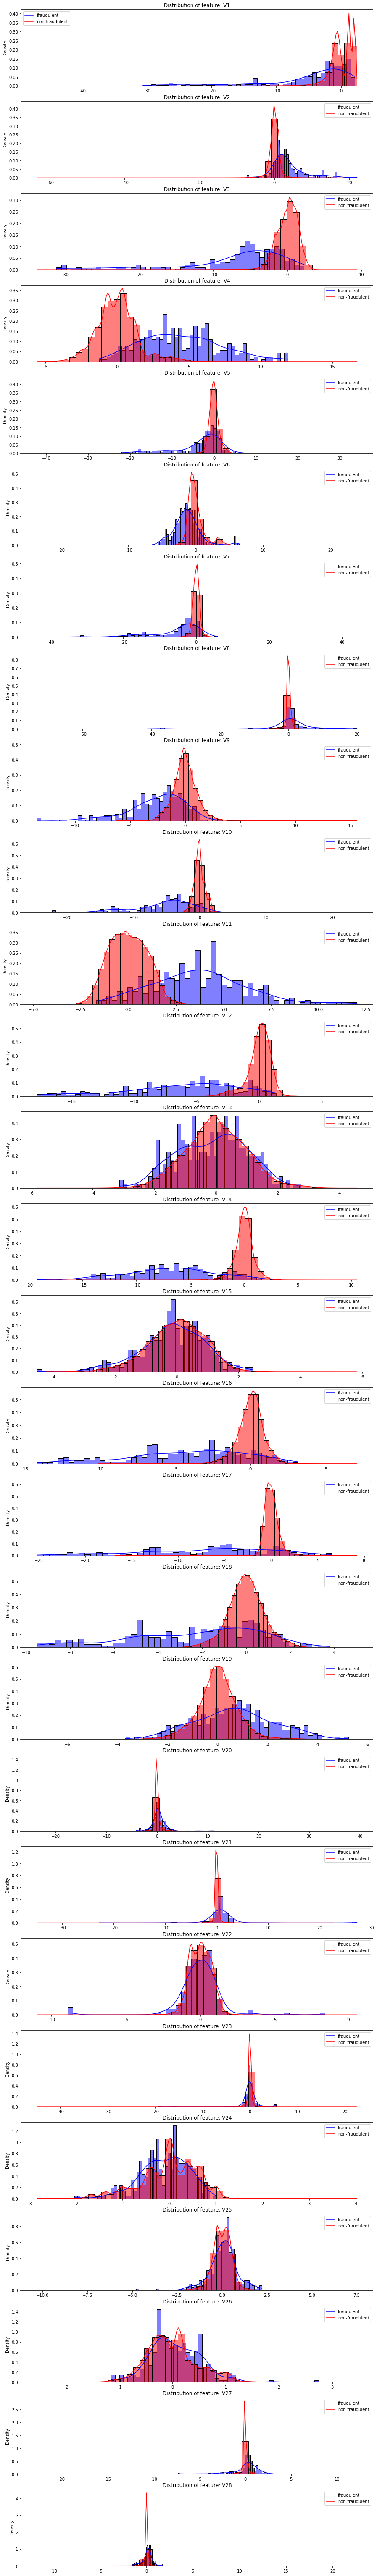

In [ ]:
import matplotlib.gridspec as gridspec
import seaborn as sns
features=[f for f in df.columns if 'V' in f]
nplots=np.size(features)
plt.figure(figsize=(15,4*nplots))
gs = gridspec.GridSpec(nplots,1)
for i, feat in enumerate(features):
    ax = plt.subplot(gs[i])
    sns.histplot(X_train[feat][y_train==1], stat="density", kde=True, color="blue", bins=50)
    sns.histplot(X_train[feat][y_train==0], stat="density", kde=True, color="red", bins=50)
    ax.legend(['fraudulent', 'non-fraudulent'],loc='best')
    ax.set_xlabel('')
    ax.set_title('Distribution of feature: ' + feat)





Explain how these graphs could provide meaningful information about anomaly detection using a gaussian model. **[1]**

Anomaly can be viewed as a rare or unusual observation in the dataset and these are called as outliers. In anomaly detection, we try to identify observations that are statistically different from the rest of the observations. In order to do that we fit ‘k’ Gaussians to the data. Then we find mean and variance for each cluster and we calculate the probabilities belonging to each of the clusters.

For example in the credit card transaction dataset, the fraudulent transactions are an anomaly as the fraudulent cases lie outside the mean of the non-fraudulent transactions. From the graphs we can see that the mean and variance of the fraudulent transactions for features (V3,V4,V6,V7,V9,V10,V11,V12,V14,V16,V17,V18,V19) are well away from the normal expected behaviour. Therefore these features will help in anomaly detection leading to better F1 score more than the others such as features like V21,V22,V23,V24,V25,V26,V27,V28 the fraudulent and non-fraudulent data have very similar mean and variance making it harder to identify them leading to lower F1 score if we consider theses features. 

So these histograph plots along with the normal distribution curve help us identify which features will be usefull in creating a high accuracy good model.




## **Part 2: Single feature model with one Gaussian distribution: [2.5 Marks]**
We'll start by making a prediction using **a single feature of our dataset at a time**. 

  1. Fit a single Gaussian distribution on a single feature of **the full training dataset** (both classes) using ``sklearn.mixture.GaussianMixture`` when ``n_components=1``. **[0.25]**
  2. Compute AUC (Area under the ROC Curve) based on ``sklearn.mixture.GaussianMixture.score_samples`` on the full training set (including both classes).  **[0.25]**
  3. Repeat the above steps for each of the features and present your findings in a table. **[0.5]**
  4. Find the best feature to distinguish fraudulent transactions from non-fraudulent transactions based on AUC. **[0.25]**
  5. Make a prediction based on a model's scores: If the `score_samples` is lower than a threshold, we consider that transaction as a fraud. Find an optimal threshold that maximizes the F1 Score in the training set. (Do not check every possible value for threshold, come up with a faster way!) Compute F1 score using `sklearn.metrics.f1_score`. **[0.5]**

  6. If we fit our Gaussian on only non-fraudulent transactions instead of the whole training set (in step 1), how would that change our model's performance? why? Experiment and explain! **[0.75]**



In [ ]:
#Fitting both classes on a single Gaussian distribution and finding AUC
from sklearn.mixture import GaussianMixture
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
auc_scores = []
#Selecting one feature at a time to find AUC
for feat in features:
  X_train_mod = X_train[feat]
  gm = GaussianMixture(n_components = 1)
  X_t = np.array(X_train_mod).reshape(-1, 1)
  gm.fit(X_t)
  sc = gm.score_samples(X_t)
  auc = roc_auc_score(y_train, 1-sc)
  auc_scores.append(auc)

auc_scores1 = pd.DataFrame(auc_scores)
auc_scores1.columns = ['AUC Scores']
print('The list of AUC scores for each features are :')
print(auc_scores1)
print('The best feature based on AUC score is', features[auc_scores.index(max(auc_scores))])
print('The corresponding AUC score is :', max(auc_scores))


The list of AUC scores for each features are :
    AUC Scores
0     0.705102
1     0.837499
2     0.876537
3     0.892103
4     0.771825
5     0.734380
6     0.862967
7     0.773238
8     0.802874
9     0.913600
10    0.897175
11    0.920180
12    0.572152
13    0.952459
14    0.514764
15    0.902137
16    0.934852
17    0.808030
18    0.741874
19    0.734692
20    0.833521
21    0.561287
22    0.696326
23    0.469229
24    0.574918
25    0.503272
26    0.835479
27    0.814201
The best feature based on AUC score is V14
The corresponding AUC score is : 0.9524586211308497


In [ ]:
#Selecting the best AUC feature and finding the F1 score for that feature
sel_feat = features[auc_scores.index(max(auc_scores))]
x_train = X_train[sel_feat]
gm = GaussianMixture(n_components = 1)
X_t1 = np.array(x_train).reshape(-1, 1)
gm.fit(X_t1)
s = gm.score_samples(X_t1)
prev_f1 = []
j = 0
counter = 0
for i in range(200,500):
  thres = sorted(s)[i]
  f1 = f1_score(y_train, s < thres)
  prev_f1.append(f1)
  #The loop is used to stop the iteration if the f1 score decresed for specific amount of time
  if f1 < prev_f1[j-1]: 
    counter += 1
    #print(counter)
    if counter == 100:
      break
  else:
    #print('For a i: ', i , 'the f1 score is: ', '%3f' % f1)
    j += 1
#The best F1 score and it's threshold is printed
f_thres = sorted(s)[prev_f1.index(max(prev_f1))]
print('The best f1 score is:', max(prev_f1)) 
print('The corresponding threshold used is:',f_thres )




The best f1 score is: 0.6146788990825689
The corresponding threshold used is: -46.59946322645886


In [ ]:
#Creating the Non-Fraudulent dataset
auc_scores1 = []
whole_data = pd.concat([X_train,y_train], axis = 1)
non_fra = whole_data['Class'] == 0
valid = whole_data[non_fra]

#Finding the AUC for the non-fraudulent data only and using one feature at a time 
for feat in features:
  X_train_mod1 = valid[feat]
  X_train_mod1 = pd.DataFrame(X_train_mod1)
  gm = GaussianMixture(n_components = 1)
  g = gm.fit(X_train_mod1)
  X_train_modif = X_train[feat]
  sc1 = g.score_samples(np.array(X_train_modif).reshape(-1,1))
  auc = roc_auc_score(y_train, 1-sc1)
  auc_scores1.append(auc)

auc_scores2 = pd.DataFrame(auc_scores1)
auc_scores2.columns = ['AUC Scores']
print('The list of AUC scores for each features are :')
print(auc_scores2)

#printing the best AUC score and it's corresponding feature
print('The best feature based on AUC score is', features[auc_scores1.index(max(auc_scores1))])
print('The corresponding AUC score is :', max(auc_scores1))

The list of AUC scores for each features are :
    AUC Scores
0     0.705350
1     0.838015
2     0.877392
3     0.892612
4     0.771881
5     0.734514
6     0.863167
7     0.773353
8     0.803263
9     0.913558
10    0.897612
11    0.920788
12    0.572142
13    0.952599
14    0.514781
15    0.902069
16    0.934440
17    0.807980
18    0.741989
19    0.734835
20    0.833878
21    0.561289
22    0.696345
23    0.469245
24    0.574931
25    0.503278
26    0.835538
27    0.814264
The best feature based on AUC score is V14
The corresponding AUC score is : 0.9525990781886603


In [ ]:
#Finding the F1 score using the best feature obtained from the prevs cell using only non-fraudulent data
sel_feat1 = features[auc_scores1.index(max(auc_scores1))]
x_train = X_train[sel_feat]
gm = GaussianMixture(n_components = 1)
X_t1 = np.array(x_train).reshape(-1, 1)
gm.fit(X_t1)
s = gm.score_samples(X_t1)
prev_f1 = []
j = 0
counter = 0
for i in range(200,500):
  thres = sorted(s)[i]
  f1 = f1_score(y_train, s < thres)
  prev_f1.append(f1)
  if f1 < prev_f1[j-1]:
    counter += 1
    if counter == 100:
      break
  else:
    #print('For a i: ', i , 'the f1 score is: ', '%3f' % f1)
    j += 1
 

f_thres = sorted(s)[prev_f1.index(max(prev_f1))]
print('The best f1 score is:', max(prev_f1))
print('The corresponding threshold used is:',f_thres )


The best f1 score is: 0.6146788990825689
The corresponding threshold used is: -46.59946322645886


**If we fit our Gaussian on only non-fraudulent transactions instead of the whole training set (in step 1), how would that change our model's performance? why? Experiment and explain!**


After fitting the gaussian using only non-fraudulent data to find the AUC and F1 score the performance didn't change it remained the same. This is because the dataset is imbalanced (causing the results to be skewed) as we have more samples of non-fraudulent than fraudulent the performance won't get affected if we fit our model only to non-fraudulent data.

## **Part 3: Multiple feature model with one Gaussian distribution: [2.5 Marks]**
This part is similar to Part 2, but here we will pick two features and set the number of components visually.

 1. Pick two features (say, f1 and f2). 
 2. Scatter plot (plt.scatter) those features on a figure (f1 on the x-axis and f2 on the y-axis). **[0.25]**
 3. On the scatter plot color the data-points based on their class (non-fraudulents blue and fraudulents red). **[0.25]**
 4. Based on your plots decide how many Gaussian components (``n_components``) you need to fit the data (focus on valid transactions). Explain.  **[0.5]**
 5. Fit your Gaussian model on all the data-points. **[0.25]**
 6. Compute AUC **[0.25]**
 7. Pick 3 new sets of features and repeat steps 2 to 6. **[0.5]**
 8. Pick the set with the highest AUC.
 9. Find a threshold to maximize your F1 Score.**[0.25]**
 10. Plot a figure similar to step 3 and put a circle around outliers based on your threshold (use the code of the similar figure in tutorial) **[0.25]**




In [ ]:
#mapping 0's and 1's in the column 'Class' to non-fraudulent and fraudulent respectively
credit_data = pd.concat([X_train,y_train], axis = 1)
credit_data['Class'] = credit_data['Class'].map({0 : 'non-fraudulents', 1 : 'fraudulents'}) 


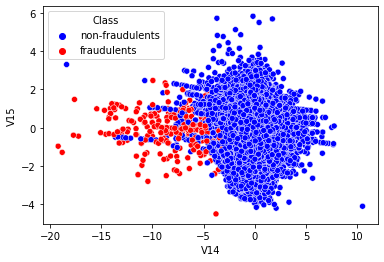

In [ ]:
#Plotting features V14 AND V15
import seaborn as sns
sns.scatterplot(data=credit_data, x="V14", y="V15", hue="Class", palette=['blue','red'])


From the above scatter plot we can see that the non-fraudulent data is forming one big cluster. So, it's best to go with **1 component** to avoid overfitting. The reason we focus on the non-fraudulent data is because **the data is unbalanced** so it's better to focus on the larger set than the smaller one.




In [ ]:
#AUC Score for the features V14 and V15
#Creating a function 'compute_auc' to find AUC for a pair of features
def compute_auc(feature1,feature2,component_number):
  auc_scores = []
  feat_list = [feature1,feature2]
  X_train_mod = X_train[feat_list]
  gm = GaussianMixture(n_components = component_number)
  gm.fit(X_train_mod)
  sc = gm.score_samples(X_train_mod)
  auc = roc_auc_score(y_train, 1-sc)
  auc_scores.append(auc)
  
  return auc_scores, feat_list

auc = compute_auc('V14','V15', 1)
#printing the best AUC score
print('The AUC score of features', auc[1] ,'is :', max(auc[0]))


The AUC score of features ['V14', 'V15'] is : 0.9594382475025508


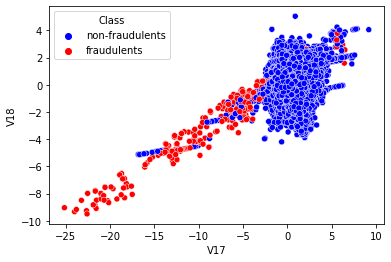

In [ ]:
#Plotting features V17 AND V18
sns.scatterplot(data=credit_data, x="V17", y="V18", hue="Class", palette=['blue','red'])

Here also we can see that the non-fraudulent data is forming one big cluster. So, it's best to go with **1 component** to avoid overfitting. 





In [ ]:
#AUC Score for the features V17 and V18
auc = compute_auc('V17','V18', 1)
print('The AUC score of features', auc[1] ,'is :', max(auc[0]))


The AUC score of features ['V17', 'V18'] is : 0.9286764623958779


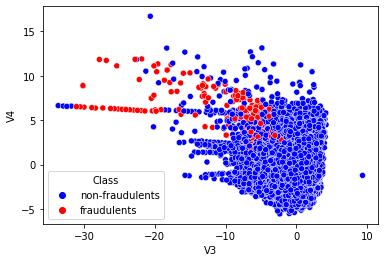

In [ ]:
#Plotting features V3 AND V4
sns.scatterplot(data=credit_data, x="V3", y="V4", hue="Class", palette=['blue','red'])


Again, we can see that the non-fraudulent data is forming one big cluster. So, we chose **1 component** to avoid overfitting.

In [ ]:
#AUC Score for the features V3 and V4
auc = compute_auc('V3','V4', 1)
print('The AUC score of features', auc[1] ,'is :', max(auc[0]))


The AUC score of features ['V3', 'V4'] is : 0.9226838221185059


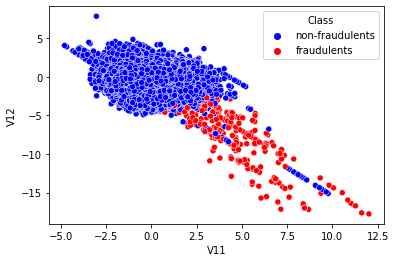

In [ ]:
sns.scatterplot(data=credit_data, x="V11", y="V12", hue="Class", palette=['blue','red'])

The non-fraudulent data is forming one big cluster. So, we are choosing 1 component  again to avoid overfitting.

In [ ]:
#AUC Score for the features V11 and V12
auc = compute_auc('V11','V12', 1)
print('The AUC score of features', auc[1] ,'is :', max(auc[0]))


The AUC score of features ['V11', 'V12'] is : 0.924491849915138


In [ ]:
#The best AUC score is for the V14 and V15 set. We'll be calculating the f1 score for this set

x_train1 = X_train[['V14','V15']]
gm = GaussianMixture(n_components = 1)
X_t1 = pd.DataFrame(x_train1)
gm.fit(X_t1)
score = gm.score_samples(X_t1)
prev_f1 = []
j = 0
counter = 0
for i in range(200,500):
  threshold = sorted(score)[i]
  f1 = f1_score(y_train, score < threshold)
  prev_f1.append(f1)
  if f1 < prev_f1[j-1]:
    counter += 1
    if counter == 100:
      break
  else:
    #print('For a i: ', i , 'the f1 score is: ', '%3f' % f1)
    j += 1
#Getting the threshold for the best F1 score
f_threshold = sorted(score)[prev_f1.index(max(prev_f1))]
print('The best f1 score is:', max(prev_f1))
print('The corresponding threshold used is:', f_threshold)

The best f1 score is: 0.6059701492537313
The corresponding threshold used is: -45.578156716824374


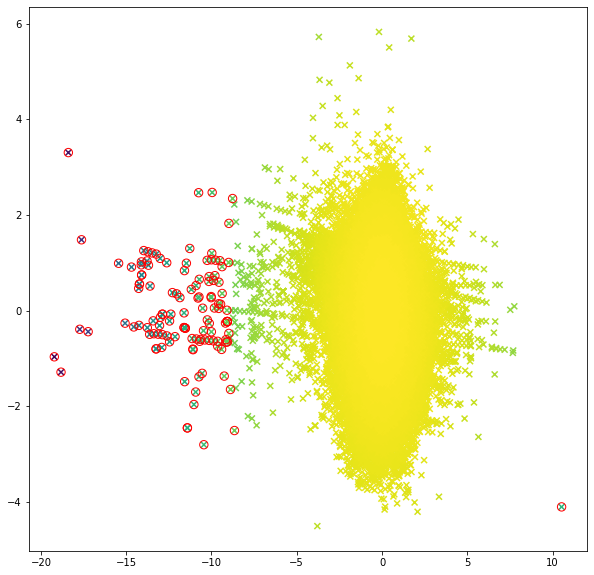

In [ ]:
#Plotted a scatter plot and circled the outliers using the optimal threshold we calculated

plt.figure(figsize=(10,10))
X_train1 = np.array(X_train[['V14','V15']])
plt.scatter(X_train1[:,0],X_train1[:,1],c=gm.score_samples(X_t1),cmap='viridis',marker='x')
threshold = f_threshold
outliers = np.nonzero(score<threshold)[0]
plt.scatter(X_train1[outliers,0],X_train1[outliers,1],marker="o",facecolor= "none",edgecolor="r",s=70)
plt.show()

## **Part 4: Single feature model with two Gaussian distributions. [3 Marks]**
Now we will use two separate distributions for fraudulent and non-fraudulent transactions.
  1.  Fit a Gaussian distribution ($G_1$) on a feature of **non-fraudulent transactions** using ``sklearn.mixture.GaussianMixture`` when ``n_components=1``. **[0.5]**
  2. Fit another Gaussian distribution ($G_2$) on the same feature but for **fraudulent transactions** using ``sklearn.mixture.GaussianMixture`` when ``n_components=1``. **[0.5]**
  3. Compute the score samples ($S$) for both $G_1$ and $G_2$ on the **whole training set** to get $S_1$ and $S_2$, respectively. **[0.5]**
  4. Find an optimal $c$ (a real number) that maximizes F1 Score for a model such that if $S_1 < c \times S_2$, the transaction is classified as a fraud. For example, if $c=1$ we could say that if $S_2$ is greater than $S_1$, ($S_1$<$S_2$) then the transaction is a fraud (the transaction belongs to the $G_2$ distribution which represents fraudulent transactions). For start consider $c$ in $[0,10]$ with steps of 0.1, you can change this window in your experiments if needed. **[0.5]**
  5. Repeat the steps above for all the features. What is the best F1 Score that you get? Which feature and what c? **[1]**

In [ ]:
#Spliting the dataset into two dataframe 1)Fradulent and 2)Non-Fradulent 
whole_data = pd.concat([X_train,y_train], axis = 1)
non_fra = whole_data['Class'] == 0
valid = whole_data[non_fra]
fraud = whole_data['Class'] == 1
invalid = whole_data[fraud]
valid = valid.drop(columns = ['Class'])
invalid = invalid.drop(columns = ['Class'])

In [ ]:
#Fitting the Non-Fraudulent and Fraudulent data into two GM and computing it with the optimal c value

f1_list = []
c_list = []
for feat in features:
  X_train_mod = valid[feat]
  X_train_mod2 = invalid[feat]
  gm1 = GaussianMixture(n_components = 1,covariance_type = 'full', random_state=0)
  gm2 = GaussianMixture(n_components = 1,covariance_type = 'full', random_state=0)
  X_t = np.array(X_train_mod).reshape(-1, 1)
  X_t2 = np.array(X_train_mod2).reshape(-1, 1)
  G1 = gm1.fit(X_t)
  G2 = gm2.fit(X_t2)
  X_train_mod3 = X_train[feat]
  S1 = G1.score_samples(pd.DataFrame(X_train_mod3))
  S2 = G2.score_samples(pd.DataFrame(X_train_mod3))
  temp_f1 = []
  temp_c = []
  c1 = [x * 0.1 for x in range(0, 100)]
  for i in c1:
    f1 = f1_score(y_train, S1 < (i*S2))
    temp_f1.append(f1)
    temp_c.append(i)
  
  f1_list.append(max(temp_f1))
  c_list.append(temp_c[temp_f1.index(max(temp_f1))])


print('The best F1 score is: ', max(f1_list))
print('The corresponding C value is: ', c_list[f1_list.index(max(f1_list))])
print('The corresponding Feature is: ', features[f1_list.index(max(f1_list))])

The best F1 score is:  0.6866666666666666
The corresponding C value is:  5.0
The corresponding Feature is:  V12


## **Part 5: Multivariate and Mixture of Gaussians Distribution [4 Marks]**
We now want to build an outlier detection model that performs well in terms of F1 score. To design your model, you can benefit from:

*   No restrictions on the number of features - use as few or as many as you want! (multivariate). 
*   To fit your model, you can take advantage of the Gaussian mixture model where you can set the number of components [help](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html) .
*   You can choose to fit your Gaussians on non-fraudulent transactions or to both classes. 


It is up to you how to design your model. Try at least 10 different models and report the AUC (if applicable) and the best F1 score for each one. What kind of model works better? How many features are best (and which ones)? How many Gaussians? How many components? Summarize your findings with tables and plots. **[4]**


**HINT !**

Want an F1 score above $85\%$? Try a two gaussian model, multiple features, single component for valid transaction and multiple components for fraudulent ones! Why does it make sense to have multiple components for the fraudulent transactions?

In [ ]:
#1 Model with 2 gaussians, multiple features (1-component)non-fraudulent and (3-components)fraudulent transactions
all_f1_scores = []
all_c_values = []
def multivariate(start_feature,end_feature,comp1,comp2):
  gm1 = GaussianMixture(n_components = comp1)
  gm2 = GaussianMixture(n_components = comp2)
  Valid1 = gm1.fit(valid.loc[:,start_feature:end_feature])
  Invalid1 = gm2.fit(invalid.loc[:,start_feature:end_feature])
  X_train_mod3 = X_train
  S1 = Valid1.score_samples(pd.DataFrame(X_train_mod3.loc[:,start_feature:end_feature]))
  S2 = Invalid1.score_samples(pd.DataFrame(X_train_mod3.loc[:,start_feature:end_feature]))
  prevs_f1 = []
  c_value = []
  c2 = [x * 0.1 for x in range(1, 200)]
  for i in c2:
    #threshold = S1 < (i*S2)
    f1 = f1_score(y_train, S1 < (i*S2))
    prevs_f1.append(f1)
    c_value.append(i)
    #print('For i:', i , 'the f1 score is: ', '%3f' % f1)
  threshold1 = c_value[prevs_f1.index(max(prevs_f1))]
  return prevs_f1,comp1,comp2,start_feature,end_feature,threshold1

comp_f1 = multivariate('V10','V17',1,3)
all_f1_scores.append(max(comp_f1[0]))
all_c_values.append(comp_f1[5])
print('The best f1 score is:', max(comp_f1[0]))
print('The corresponding c value is:', comp_f1[5])
print('The number of features used are:',len(valid.loc[:,comp_f1[3]:comp_f1[4]].columns))
print('and they are:', valid.loc[:,comp_f1[3]:comp_f1[4]].columns)
print('The number of components used for non-fraudulent data is:',comp_f1[1],'and for fraudulent data is:',comp_f1[2])

The best f1 score is: 0.8199697428139184
The corresponding c value is: 6.1000000000000005
The number of features used are: 8
and they are: Index(['V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17'], dtype='object')
The number of components used for non-fraudulent data is: 1 and for fraudulent data is: 3


In [ ]:
#2 Same as previous but with different features and the non-fraudulent component is increased
comp_f1 = multivariate('V1','V10',1,5)
all_f1_scores.append(max(comp_f1[0]))
all_c_values.append(comp_f1[5])
print('The best f1 score is:', max(comp_f1[0]))
print('The corresponding c value is:', comp_f1[5])
print('The number of features used are:',len(valid.loc[:,comp_f1[3]:comp_f1[4]].columns))
print('The features are:', valid.loc[:,comp_f1[3]:comp_f1[4]].columns)
print('The number of components used for non-fraudulent data is:',comp_f1[1],'and for fraudulent data is:',comp_f1[2])

The best f1 score is: 0.6666666666666667
The corresponding c value is: 2.3000000000000003
The number of features used are: 10
The features are: Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10'], dtype='object')
The number of components used for non-fraudulent data is: 1 and for fraudulent data is: 5


In [ ]:
#3 Same as previous but with different features and both the fradulent,non-fraudulent component is increased

comp_f1 = multivariate('V7','V14',2,8)
all_f1_scores.append(max(comp_f1[0]))
all_c_values.append(comp_f1[5])
print('The best f1 score is:', max(comp_f1[0]))
print('The corresponding c value is:', comp_f1[5])
print('The number of features used are:',len(valid.loc[:,comp_f1[3]:comp_f1[4]].columns))
print('The features are:', valid.loc[:,comp_f1[3]:comp_f1[4]].columns)
print('The number of components used for non-fraudulent data is:',comp_f1[1],'and for fraudulent data is:',comp_f1[2])

The best f1 score is: 0.7886904761904763
The corresponding c value is: 2.0
The number of features used are: 8
The features are: Index(['V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14'], dtype='object')
The number of components used for non-fraudulent data is: 2 and for fraudulent data is: 8


In [ ]:
#4 Fitting the GM to the non-fraudulent data only and using single component
def compute_f1(start_feature,end_feature,component_number):
  auc_scores = []
  gm = GaussianMixture(n_components = component_number)
  Valid1 = gm.fit(valid.loc[:,start_feature:end_feature])
  sc = Valid1.score_samples(X_train.loc[:,start_feature:end_feature])
  auc = roc_auc_score(y_train, 1-sc)
  auc_scores.append(auc)
  prev_f1 = []
  i_value = []
  counter = 0
  j = 0
  for i in range(250,450):
    threshold = sorted(sc)[i]
    f1 = f1_score(y_train, sc < threshold)
    prev_f1.append(f1)
    i_value.append(i)
    if f1 < prev_f1[j-1]:
      counter += 1
      if counter == 100:
        break
    else:
      #print('For a i: ', i , 'the f1 score is: ', '%3f' % f1)
      j += 1
  f_threshold = sorted(sc)[prev_f1.index(max(prev_f1))]
  i_best = i_value[prev_f1.index(max(prev_f1))]
  best_auc = max(auc_scores)
  return prev_f1, i_best, f_threshold,start_feature,end_feature, best_auc


f1_model2 = compute_f1('V10','V19', 1)

all_f1_scores.append(max(f1_model2[0]))
print('The best F1 score is:', max(f1_model2[0]))
print('The corresponding threshold used is:', f1_model2[2])
print('The i value for best F1 scores is', f1_model2[1])
print('The number of features used are:',len(valid.loc[:,f1_model2[3]:f1_model2[4]].columns))
print('The features are:', valid.loc[:,f1_model2[3]:f1_model2[4]].columns)
print('The auc score is:', f1_model2[5])




The best F1 score is: 0.7538461538461538
The corresponding threshold used is: -1231.7736384841378
The i value for best F1 scores is 305
The number of features used are: 10
The features are: Index(['V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19'], dtype='object')
The auc score is: 0.9640232878500932


In [ ]:
#5 Fitting the GM to non fraudulent data only but with different features and using 3 components
f1_model2 = compute_f1('V11','V17', 3)

all_f1_scores.append(max(f1_model2[0]))
print('The best F1 score is:', max(f1_model2[0]))
print('The corresponding threshold used is:', f1_model2[2])
print('The i value for best F1 scores is', f1_model2[1])
print('The number of features used are:',len(valid.loc[:,f1_model2[3]:f1_model2[4]].columns))
print('The features are:', valid.loc[:,f1_model2[3]:f1_model2[4]].columns)
print('The auc score is:', f1_model2[5])

The best F1 score is: 0.6393442622950819
The corresponding threshold used is: -232.66243762129625
The i value for best F1 scores is 265
The number of features used are: 7
The features are: Index(['V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17'], dtype='object')
The auc score is: 0.9640804522996894


In [ ]:
#6 Fitting the GM to the non-fraudulent data only but with different features and 8 components
f1_model2 = compute_f1('V15','V22', 8)

all_f1_scores.append(max(f1_model2[0]))
print('The best F1 score is:', max(f1_model2[0]))
print('The corresponding threshold used is:', f1_model2[2])
print('The i value for best F1 scores is', f1_model2[1])
print('The number of features used are:',len(valid.loc[:,f1_model2[3]:f1_model2[4]].columns))
print('The features are:', valid.loc[:,f1_model2[3]:f1_model2[4]].columns)
print('The auc score is:', f1_model2[5])

The best F1 score is: 0.4605263157894737
The corresponding threshold used is: -171.5867471851276
The i value for best F1 scores is 263
The number of features used are: 8
The features are: Index(['V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22'], dtype='object')
The auc score is: 0.9613803969339174


In [ ]:
#7 Fitting the GM to Fradulent data only(Single Gaussian) but using multiple features and single component

def compute_fraud_f1(start_feature,end_feature,component_number):
  auc_scores = []
  gm = GaussianMixture(n_components = component_number)
  Invalid1 = gm.fit(invalid.loc[:,start_feature:end_feature])
  sc = Invalid1.score_samples(X_train.loc[:,start_feature:end_feature])
  auc = roc_auc_score(y_train, 1-sc)
  auc_scores.append(auc)
  prev_f1 = []
  i_value = []
  counter = 0
  j = 0
  for i in range(50000,60000,100):
    threshold = sorted(sc)[i]
    f1 = f1_score(y_train, sc > threshold)
    prev_f1.append(f1)
    i_value.append(i)
    if f1 < prev_f1[j-1]:
      counter += 1
      if counter == 10:
        break
    else:
      #print('For a i: ', i , 'the f1 score is: ', '%3f' % f1)
      j += 1
    #print('For i:', i , 'the f1 score is: ', '%3f' % f1)
  f_threshold = sorted(sc)[prev_f1.index(max(prev_f1))]
  i_best = i_value[prev_f1.index(max(prev_f1))]
  best_auc = max(auc_scores)
  return prev_f1, i_best, f_threshold,start_feature,end_feature, best_auc


f1_model3 = compute_fraud_f1('V10','V19', 1)
all_f1_scores.append(max(f1_model3[0]))
print('The best F1 score is:', max(f1_model3[0]))
print('The corresponding threshold used is:', f1_model3[2])
print('The i value for best F1 scores is', f1_model3[1])
print('The number of features used are:', len(valid.loc[:,f1_model3[3]:f1_model3[4]].columns))
print('The features are:', valid.loc[:,f1_model3[3]:f1_model3[4]].columns)
print('The auc score is:', f1_model3[5])


The best F1 score is: 0.004328324095765956
The corresponding threshold used is: -55.19087925687673
The i value for best F1 scores is 59700
The number of features used are: 10
The features are: Index(['V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19'], dtype='object')
The auc score is: 0.3909567588441596


In [ ]:
#8 Model without spliting the valid and invalid transactions and using single GM, multiple features and 3 components

def compute_all_f1(start_feature,end_feature,component_number):
  auc_scores = []
  gm = GaussianMixture(n_components = component_number)
  X_train_modf = gm.fit(X_train.loc[:,start_feature:end_feature])
  sc = X_train_modf.score_samples(X_train.loc[:,start_feature:end_feature])
  auc = roc_auc_score(y_train, 1-sc)
  auc_scores.append(auc)
  prev_f1 = []
  i_value = []
  counter = 0
  j = 0
  for i in range(150,400):
    threshold = sorted(sc)[i]
    f1 = f1_score(y_train, sc < threshold)
    prev_f1.append(f1)
    i_value.append(i)
    if f1 < prev_f1[j-1]:
      counter += 1
      if counter == 100:
        break
    else:
      #print('For a i: ', i , 'the f1 score is: ', '%3f' % f1)
      j += 1
  f_threshold = sorted(sc)[prev_f1.index(max(prev_f1))]
  i_best = i_value[prev_f1.index(max(prev_f1))]
  best_auc = max(auc_scores)
  return prev_f1, i_best, f_threshold,start_feature,end_feature, best_auc


f1_model4 = compute_all_f1('V10','V19', 3)

all_f1_scores.append(max(f1_model4[0]))

print('The best F1 score is:', max(f1_model4[0]))
print('The corresponding threshold used is:', f1_model4[2])
print('The i value for best F1 scores is', f1_model4[1])
print('The number of features used are:',len(valid.loc[:,f1_model4[3]:f1_model4[4]].columns))
print('The features are:', valid.loc[:,f1_model4[3]:f1_model4[4]].columns)
print('The auc score is:', f1_model4[5])





The best F1 score is: 0.5996705107084019
The corresponding threshold used is: -154.17896906265287
The i value for best F1 scores is 262
The number of features used are: 10
The features are: Index(['V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19'], dtype='object')
The auc score is: 0.9526748848027109


In [ ]:
#9 Model without spliting the valid and invalid transactions and using single GM, different features and 1 component


f1_model4 = compute_all_f1('V9','V15', 1)
all_f1_scores.append(max(f1_model4[0]))

print('The best F1 score is:', max(f1_model4[0]))
print('The corresponding threshold used is:', f1_model4[2])
print('The i value for best F1 scores is', f1_model4[1])
print('The number of features used are:',len(valid.loc[:,f1_model4[3]:f1_model4[4]].columns),'and they are:', valid.loc[:,f1_model4[3]:f1_model4[4]].columns)
print('The auc score is:', f1_model4[5])




The best F1 score is: 0.503225806451613
The corresponding threshold used is: -130.31239405750028
The i value for best F1 scores is 275
The number of features used are: 7 and they are: Index(['V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15'], dtype='object')
The auc score is: 0.9604297630602744


In [ ]:
#10 Model without spliting the valid and invalid transactions and using single GM, different features and 5 components


f1_model4 = compute_all_f1('V12','V17', 5)
all_f1_scores.append(max(f1_model4[0]))
print('The best F1 score is:', max(f1_model4[0]))
print('The corresponding threshold used is:', f1_model4[2])
print('The i value for best F1 scores is', f1_model4[1])
print('The number of features used are:',len(valid.loc[:,f1_model4[3]:f1_model4[4]].columns))
print('The features are:', valid.loc[:,f1_model4[3]:f1_model4[4]].columns)
print('The auc score is:', f1_model4[5])

The best F1 score is: 0.3977110157367668
The corresponding threshold used is: -20.766829581892463
The i value for best F1 scores is 354
The number of features used are: 6
The features are: Index(['V12', 'V13', 'V14', 'V15', 'V16', 'V17'], dtype='object')
The auc score is: 0.9607397327369005


The Best F1 score and the threshold values are selected from all the models.

In [ ]:
f_c_value = all_c_values[all_f1_scores.index(max(all_f1_scores))]
print('The best F1 score was for the model', all_f1_scores.index(max(all_f1_scores))+1)
print('The score is:',max(all_f1_scores))
print('The corresponding c value is:', f_c_value)

The best F1 score was for the model 1
The score is: 0.8199697428139184
The corresponding c value is: 6.1000000000000005


## **Part 6: Evaluating performance on test set: [1 Mark]**
**Which model worked better?** Pick your best model among all models and apply it to your test set. Report the F1 Score, precision and recall on the test set. **[1]**


In [ ]:
#Using the best model on the testing data and the precision,recall and F1 score are calculated

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
gm1 = GaussianMixture(n_components = 1)
gm2 = GaussianMixture(n_components = 3)
Valid1 = gm1.fit(valid.loc[:,'V10':'V17'])
Invalid1 = gm2.fit(invalid.loc[:,'V10':'V17'])
S1 = Valid1.score_samples(X_test.loc[:,'V10':'V17'])
S2 = Invalid1.score_samples(X_test.loc[:,'V10':'V17'])
f_c_value = 6.1
precision = precision_score(y_test, S1 < (f_c_value*S2))
recall = recall_score(y_test, S1 < (f_c_value*S2))
f1 = f1_score(y_test, S1 < (f_c_value*S2))


print('The Precision is:', precision)
print('The Recall is:', recall)
print('The F1 Score is:', f1)



The Precision is: 0.8780487804878049
The Recall is: 0.7346938775510204
The F1 Score is: 0.8


**Result:** After applying the best model to the testing data we get:

The Precision: 87.8%

The Recall: 73.46%

F1-Score: 80%